In [35]:
# packages for data loading, data analysis, and data preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# packages for modek evaluation and classification models
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from tqdm import tqdm

# packages for saving the model
import pickle 

# script that has modeling functions in it
import modeling

In [2]:
# reads in the data 
df = pd.read_csv('creditcard.csv')

In [3]:
# looks at 10 random rows in the data
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
126135,77943.0,-1.895630,2.261402,0.097307,-0.708852,0.367071,-0.103140,0.562780,0.189176,0.685210,...,-0.497839,-0.902894,-0.091001,-0.915946,0.347413,0.157523,0.962466,0.553191,7.16,0
70374,53842.0,-0.774304,0.474838,1.081765,0.244956,0.553250,-1.210144,0.823532,-0.204972,-0.321314,...,0.118812,0.390432,0.222695,0.375995,0.088613,-0.540104,-0.019961,0.034821,14.38,0
98800,66822.0,1.165907,-0.810112,0.517535,0.359200,-0.964412,0.385570,-0.834759,0.206140,-0.483048,...,-0.213116,-0.226400,-0.219571,-0.544798,0.539442,-0.192499,0.051703,0.026178,83.50,0
145308,86823.0,-0.004356,1.048543,-0.473675,-0.551370,0.876599,-0.803703,1.008385,-0.153914,0.021996,...,-0.324790,-0.842534,0.114217,0.558377,-0.425875,0.100977,0.087668,0.086733,17.88,0
191311,129203.0,1.952162,-0.803054,0.140147,0.907536,-1.708890,-1.057737,-0.942789,-0.051406,0.044103,...,-0.081425,0.245249,0.326461,0.827434,-0.385543,-0.614684,0.067995,-0.014744,34.00,0
169391,119676.0,0.026504,0.751439,0.163797,-0.769145,0.543600,-0.636805,0.845839,0.007657,-0.154895,...,-0.240132,-0.586352,0.025790,-0.365830,-0.505547,0.143482,0.237768,0.082083,2.58,0
158213,111092.0,2.102774,-0.059340,-1.464467,0.340277,0.239854,-0.761355,-0.062052,-0.249493,2.343160,...,0.073683,0.516901,0.013415,0.384170,0.302621,-0.469027,-0.035891,-0.060231,1.00,0
256676,157804.0,1.930140,-0.196311,-0.598804,1.249804,0.139400,0.717819,-0.412329,0.255383,0.918404,...,-0.502995,-1.202188,0.412910,0.137595,-0.279299,-1.125546,0.049843,-0.038708,4.99,0
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
77129,56899.0,-2.316531,-3.146354,1.372775,-1.220623,1.700094,-2.085858,-1.587104,0.432952,1.709063,...,0.180832,-0.212824,0.812619,0.173380,-0.494081,-0.985215,0.128408,0.228073,99.00,0


In [4]:
# returns each columns name, quantity, and data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [31]:
# returns an arranged correlation associated with the class column
df.corr()['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

In [5]:
# quantify Fraud and None Fraud
class_name ={0:'No Fraud',1:'Fraud'}
df['Class'].value_counts().rename(index=class_name)

No Fraud    284315
Fraud          492
Name: Class, dtype: int64

/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

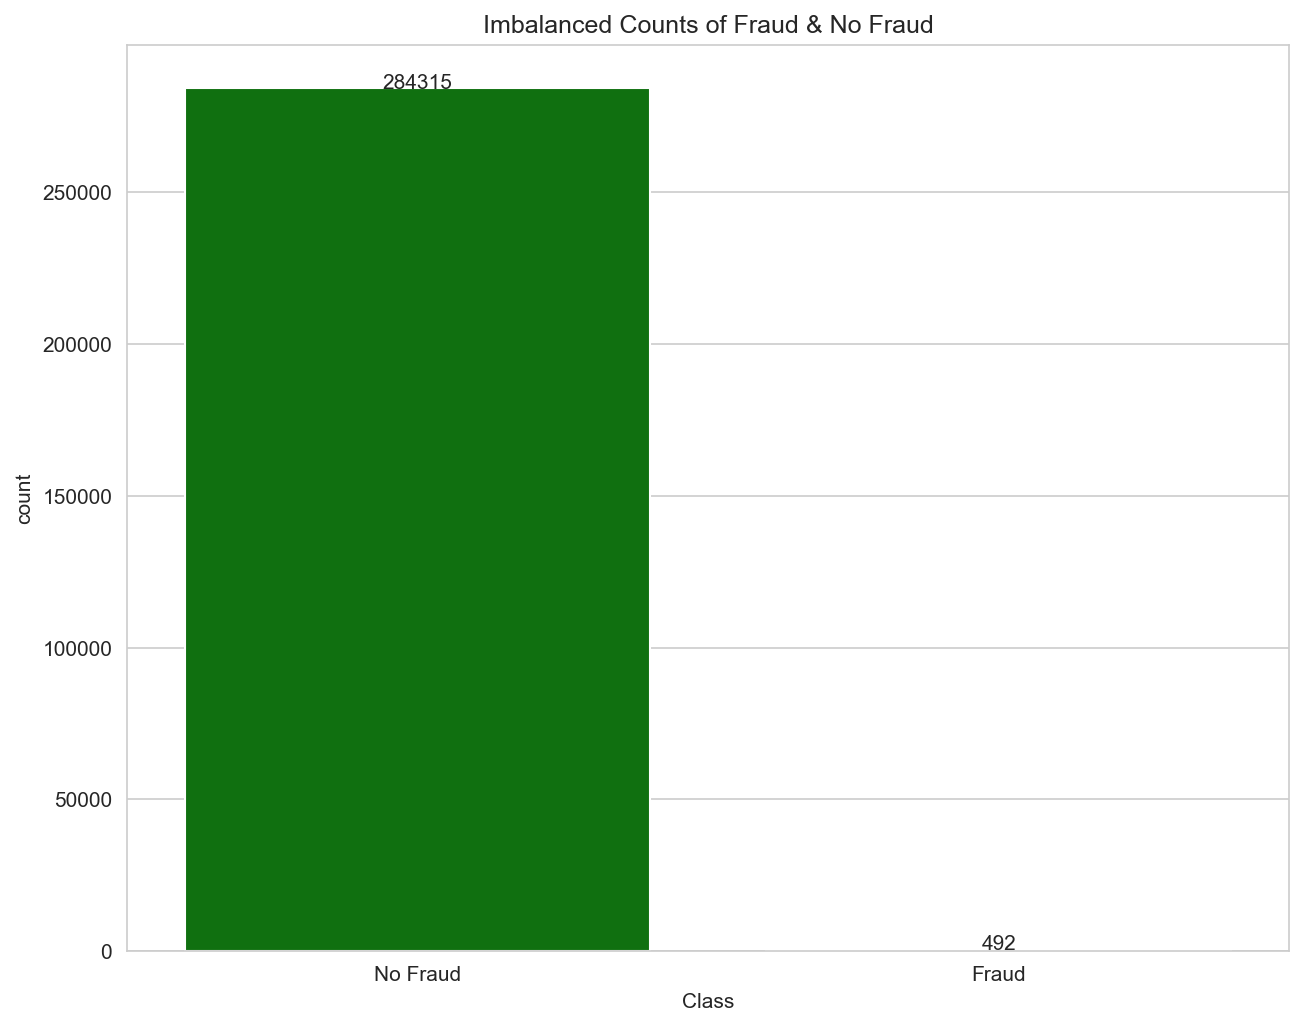

In [6]:
# visualize the imbalance in the dataset
colors = ["g", "r"]
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

x = df['Class'].replace(to_replace=[1, 0], value=['Fraud','No Fraud'])
plt.figure(figsize=(10,8),dpi=150)
ax = sns.countplot(x,palette=colors,data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
    s="{}".format(round(height,2)),ha='center')
plt.title('Imbalanced Counts of Fraud & No Fraud')
plt.savefig('Imbalanced_plot_of_data')
plt.show()

In [7]:
# splits the data into train test split, creates test size & random seed
X = df.drop('Class',axis=1)
y = df['Class']
validation_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [8]:
# concatenate our training data back together
data = pd.concat([X_train,y_train],axis=1)

#separate minority and majority classes
no_fraud = data[data['Class']==0]
fraud = data[data['Class']== 1]

# unsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(no_fraud), # match number in majority class
                          random_state=42) 
# combines majority and unsampled minority
unsampled = pd.concat([no_fraud,fraud_upsampled])

# resplitting the data
y_train_new = unsampled['Class']
X_train_new = unsampled.drop('Class',axis=1)
y_train_new.value_counts().rename(index=class_name)

No Fraud    227453
Fraud       227453
Name: Class, dtype: int64

/Users/faithful/Desktop/Data_Sci_Projects/Fraud_Detection/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


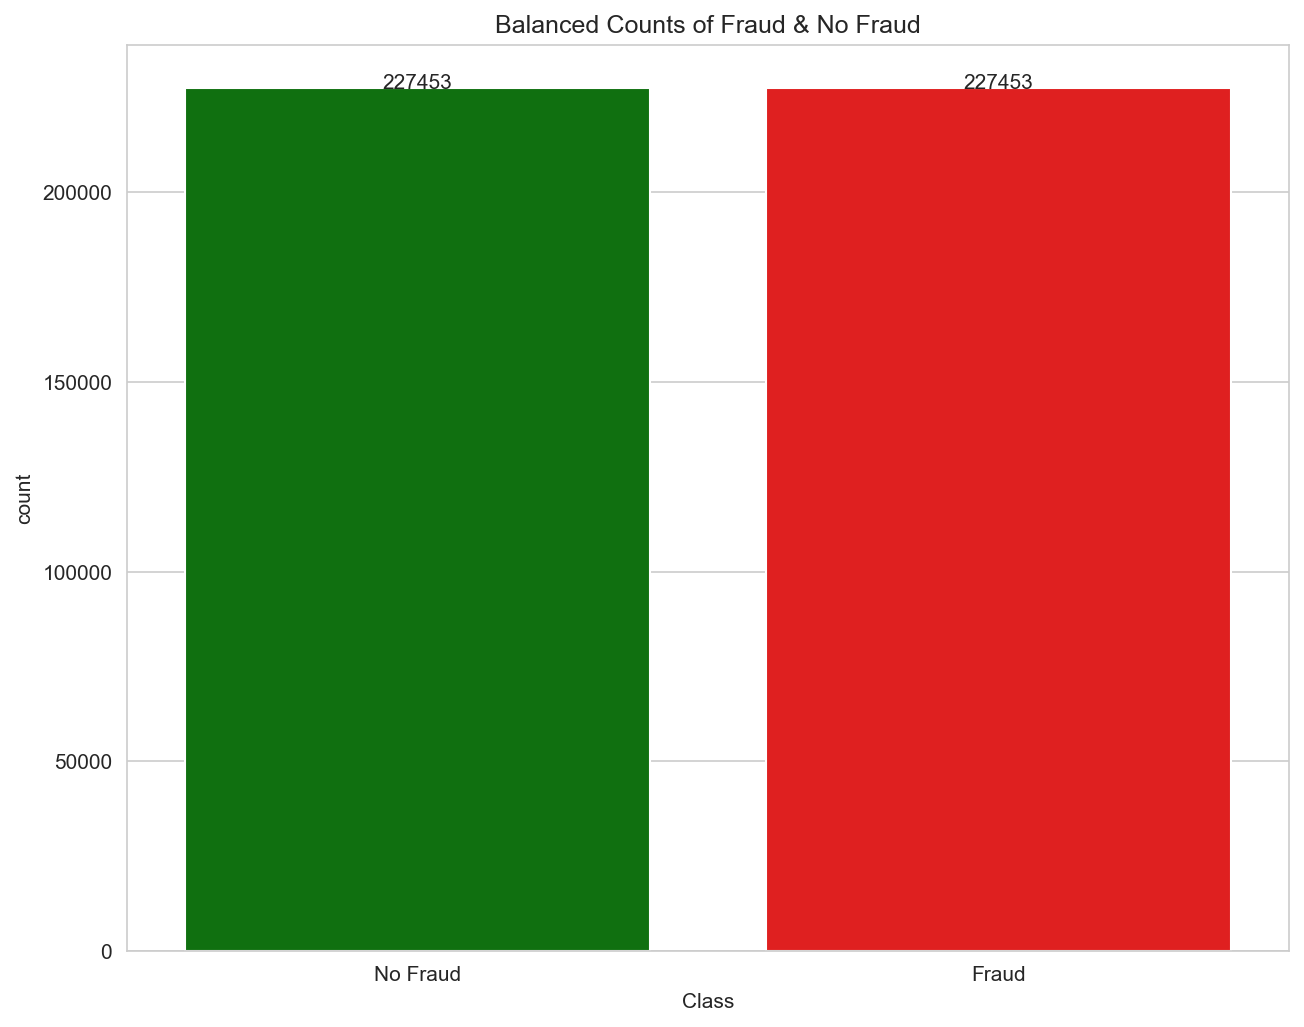

In [9]:
# visualize the new balanced dataset 
plt.figure(figsize=(10,8),dpi=150)
x = unsampled['Class'].replace(to_replace=[1, 0], value=['Fraud','No Fraud'])
ax = sns.countplot( x,data=unsampled,palette=colors)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
    s="{}".format(round(height,2)),ha='center')
plt.title('Balanced Counts of Fraud & No Fraud')
plt.savefig('Balanced_plot_of_data')
plt.show()

In [10]:
# scaling the inputs of the dataset
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test = scaler.transform(X_test)

In [15]:
# models we will be testing out [(name,model)]
models = [('LR',LogisticRegression(max_iter=300)),
          ('KNN',KNeighborsClassifier()),
          ('SVC',SVC()),
          ('XGB',XGBClassifier()),
          ('DTC',DecisionTreeClassifier()),
          ('ADA',AdaBoostClassifier()),
          ('RF', RandomForestClassifier()),
          ('ET',ExtraTreesClassifier())]

In [32]:
# tests 2 scoring metrics on all the models above (running this will take a while)
scoring = ['accuracy','recall']
for score in scoring:  
    # imported script created to store modeling code
    modeling.show_model_scores(models=models,x=X_train_new,y=y_train_new,scoring=score)

# Random Forest Classifier Tuning 

In [33]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# using a random searchCV and setting our scoring and # of CV 
scoring = 'recall'
kfold = KFold(n_splits=5,random_state=seed,shuffle=True)

rs = RandomizedSearchCV(estimator=RandomForestClassifier(),
                       param_distributions=random_grid,
                       cv= kfold,
                       n_iter=120,
                       verbose=3,
                       n_jobs= -1,
                        scoring=scoring)
# fitting the random search model to our training dataset
rs.fit(X_train_new,y_train_new)
print(f'Best Recall score of {rs.best_score_} using these params {rs.best_params_}')

In [25]:
print(f'Best Recall score of {rs.best_score_} using these params {rs.best_params_}')

Best Recall score of 1.0 using these params {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}


# Evaluating Random Forest Model

In [27]:
# stores final model with the best parameters found from random search
final_model = RandomForestClassifier(n_estimators=1600,max_features='auto',
                                     min_samples_split=5,min_samples_leaf=1,max_depth=70,
                                    bootstrap=True)

Training Mean Accuracy score: 1.0
Testing Mean Accuracy score: 0.9996137776061234
Prediction completed.


<Figure size 1500x1200 with 0 Axes>

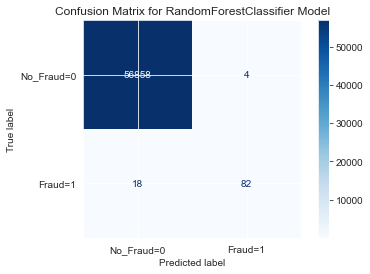

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.95      0.82      0.88       100

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [28]:
# evaluates the model performance
modeling.evaluate_model(final_model,X_train_new,y_train_new,X_test,y_test)

# Saving the model

In [36]:
# saves the model
output_model = {'model':final_model}
pickle.dump(output_model,open('model_file'+".p",'wb'))